# Figure S5: Score and Successful ANOVAs

In [4]:
import pandas as pd
import numpy as np
import os
import json
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import importlib
from scipy.stats import circvar, circstd, pearsonr
import pyreadstat

from trial import Trial
from util import dist
from constants import COND_LABELS, FS
from plots import anova_figure
import analysis_helper

importlib.reload(analysis_helper)

plt.style.use('./jg.mplstyle')

In [6]:
df_trials = pd.read_pickle('../data/df_trials_v4_spatial.pickle')
df_trials = df_trials[df_trials.practice == 0]

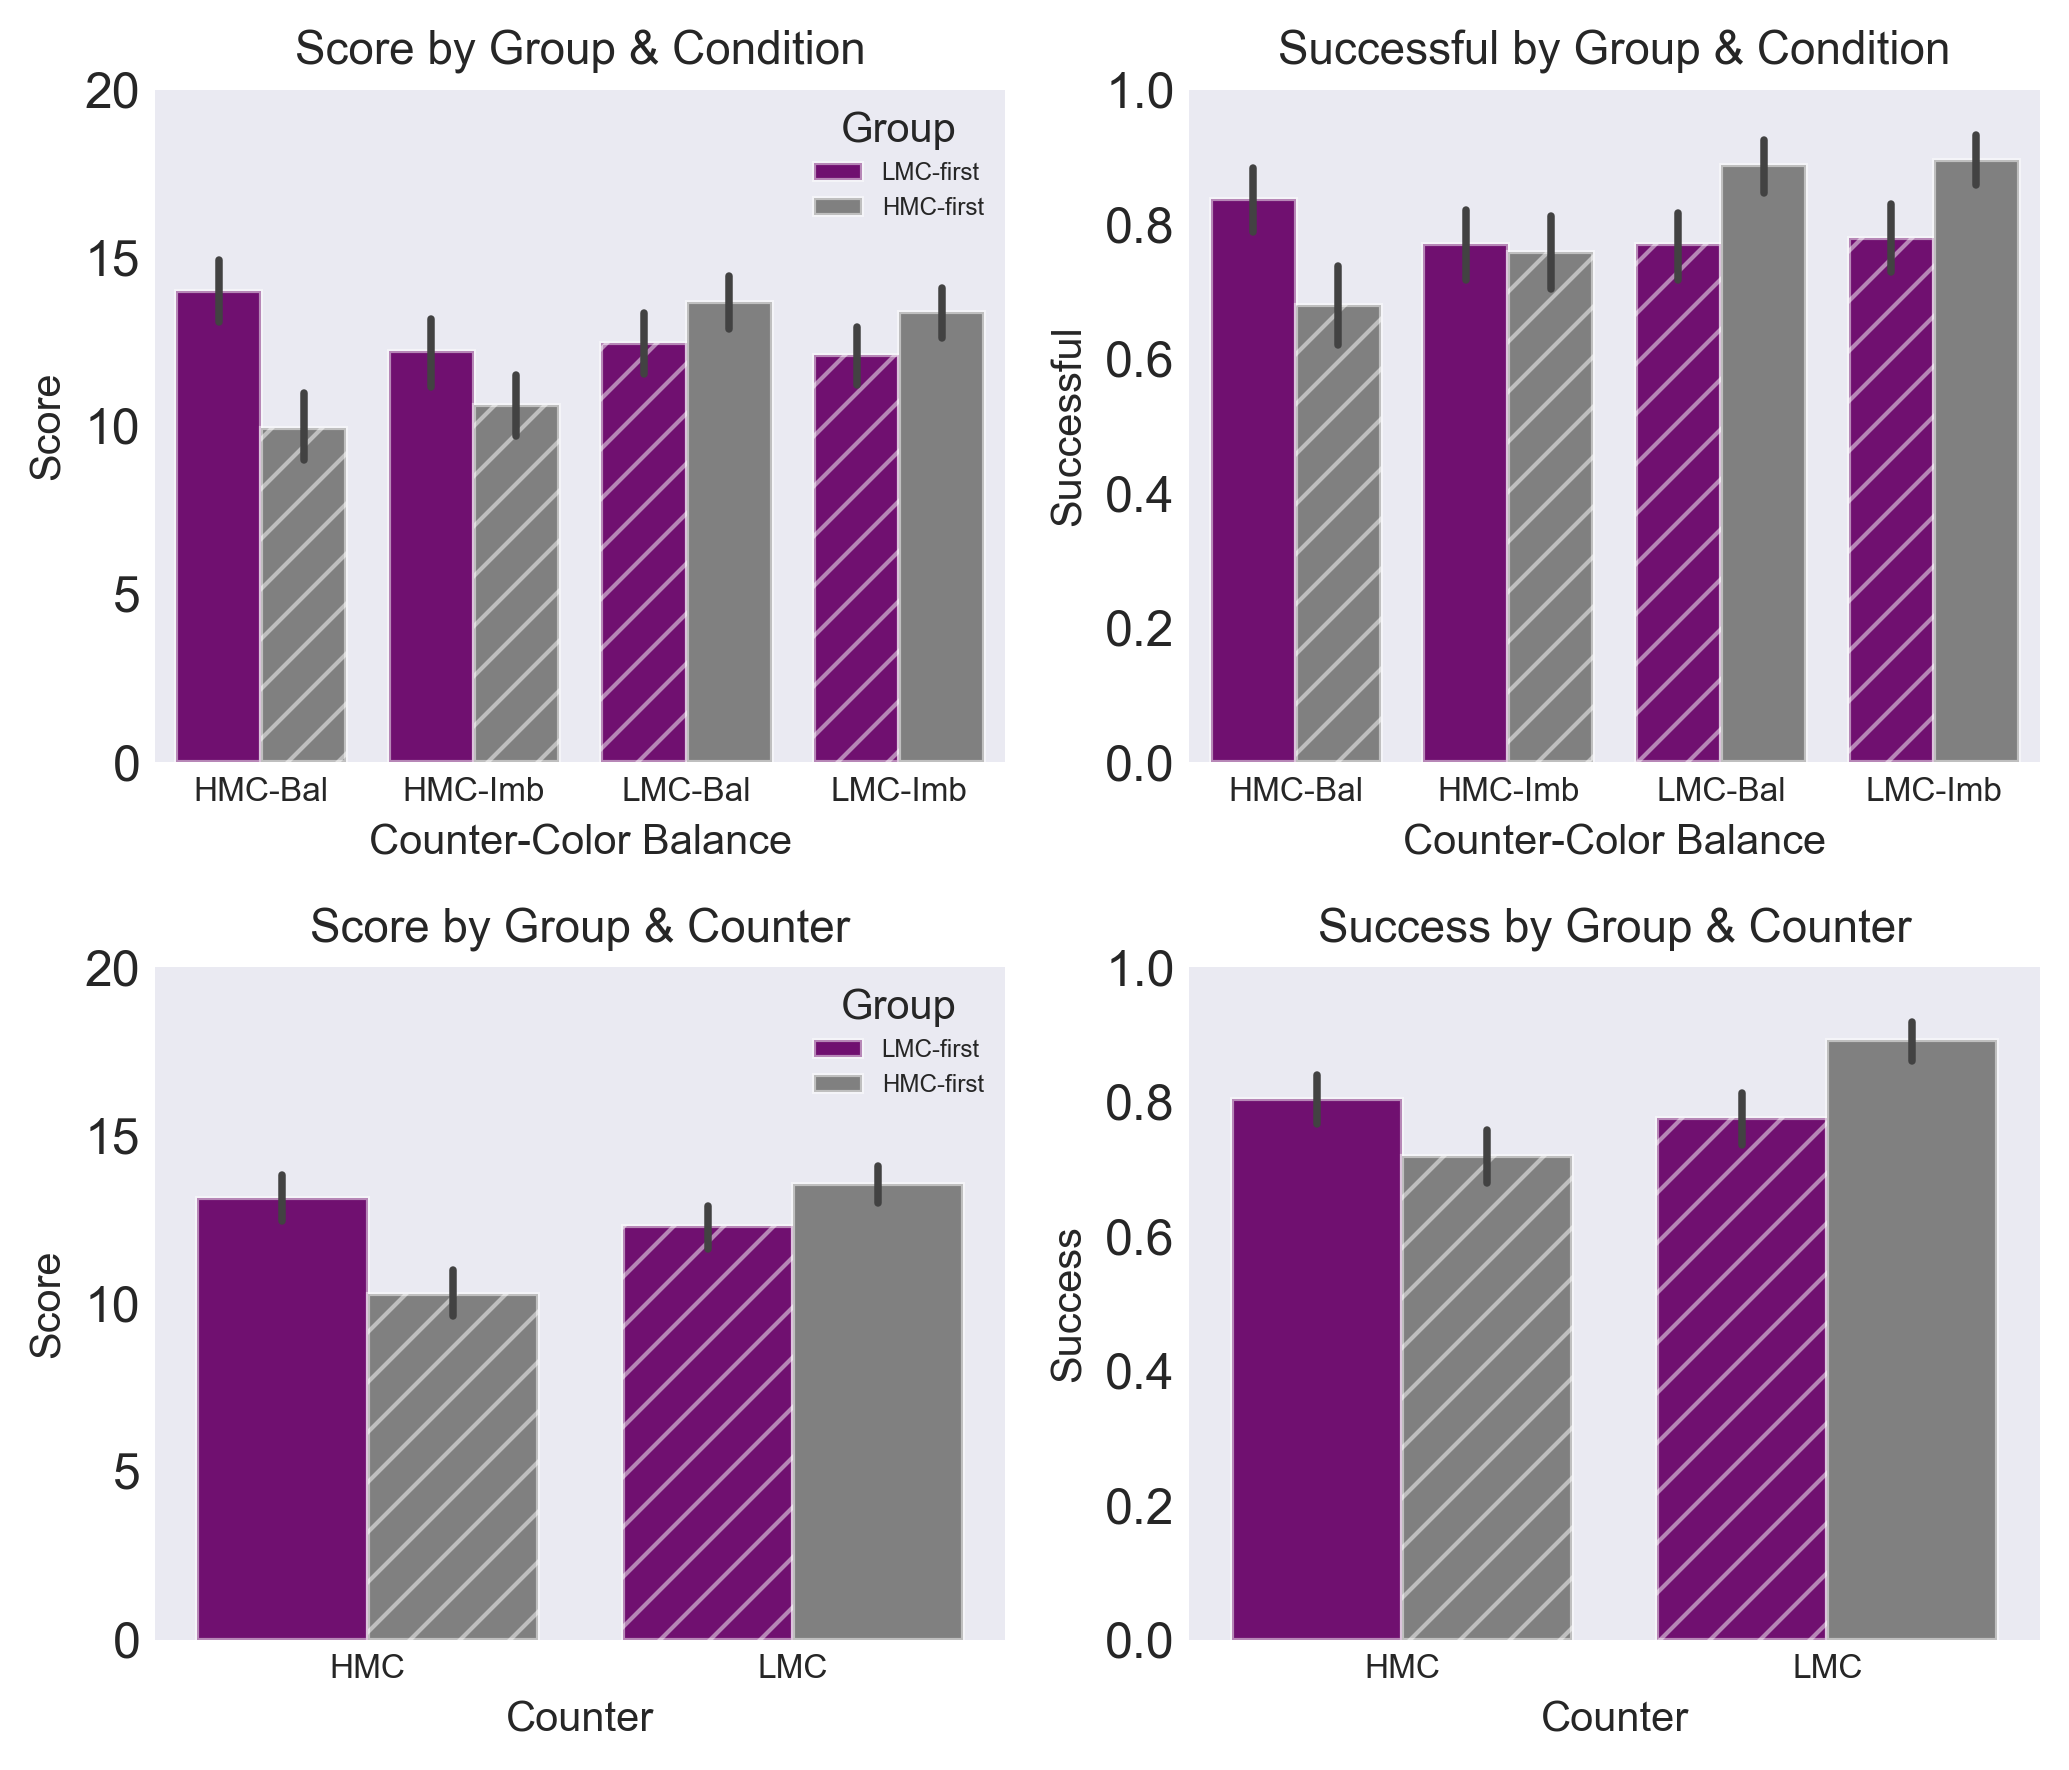

In [8]:
df_trials['count-bal'] = df_trials['cond_count'].map({'G': "HMC", 'C': "LMC"}) + "-" + df_trials['cond_bal'].map({'FB': "Imb", "E": "Bal"})

fig, axs = plt.subplots(2, 2, dpi=300, figsize=(7, 6))
anova_figure(df=df_trials, ax=fig.axes[0], dv='score', dv_label="Score", x='count-bal', ylim=(0, 20), show_legend=True)
anova_figure(df=df_trials, ax=fig.axes[1], dv='successful', dv_label="Successful", x='count-bal', ylim=(0, 1), show_legend=False)
anova_figure(df=df_trials, ax=fig.axes[2], dv='score', 
             dv_label="Score", x='cond_count', 
             title="Score by Group & Counter",             
             ylim=(0, 20), show_legend=True)
anova_figure(df=df_trials, ax=fig.axes[3], dv='successful', 
             dv_label="Success", x='cond_count', 
             title="Success by Group & Counter",             
             ylim=(0, 1), show_legend=False)
plt.tight_layout()
plt.savefig("./out/score_two_dvs_anova_bar.png")
plt.show()